<h1>Machine Learning

#### KMeans Clustering

__Purpose:__
The purpose of this lab exercise is to learn how to use an unsupervised learning algorithm, **K-means** using sklearn.   

__At the end of this lab you will be able to:__
> 1. Run a K-means algorithm.
> 2. Understand what parameters are customizable for the algorithm.
> 3. Know how to use the inertia curve to determine the optimal number of clusters.

### K-Means Overview

**K-means** is one of the most basic clustering algorithms.  It relies on finding cluster centers to group data points based on minimizing the sum of squared errors between each datapoint and its cluster center.  

In [1]:
#import library
import matplotlib.pyplot as plt
import seaborn as sns

[]

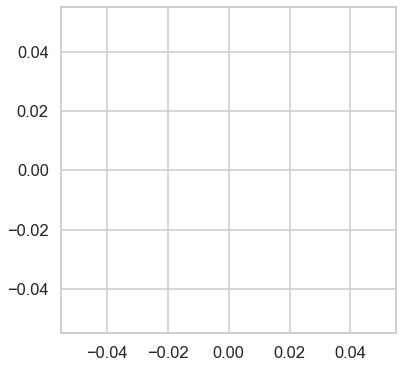

In [2]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")
plt.plot()

In [3]:
import numpy as np
angle = np.linspace(0,2*np.pi,20, endpoint = True)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
angle

array([0.        , 0.33069396, 0.66138793, 0.99208189, 1.32277585,
       1.65346982, 1.98416378, 2.31485774, 2.64555171, 2.97624567,
       3.30693964, 3.6376336 , 3.96832756, 4.29902153, 4.62971549,
       4.96040945, 5.29110342, 5.62179738, 5.95249134, 6.28318531])

In [4]:
X

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.45817242e-01,  3.24699469e-01],
       [ 7.89140509e-01,  6.14212713e-01],
       [ 5.46948158e-01,  8.37166478e-01],
       [ 2.45485487e-01,  9.69400266e-01],
       [-8.25793455e-02,  9.96584493e-01],
       [-4.01695425e-01,  9.15773327e-01],
       [-6.77281572e-01,  7.35723911e-01],
       [-8.79473751e-01,  4.75947393e-01],
       [-9.86361303e-01,  1.64594590e-01],
       [-9.86361303e-01, -1.64594590e-01],
       [-8.79473751e-01, -4.75947393e-01],
       [-6.77281572e-01, -7.35723911e-01],
       [-4.01695425e-01, -9.15773327e-01],
       [-8.25793455e-02, -9.96584493e-01],
       [ 2.45485487e-01, -9.69400266e-01],
       [ 5.46948158e-01, -8.37166478e-01],
       [ 7.89140509e-01, -6.14212713e-01],
       [ 9.45817242e-01, -3.24699469e-01],
       [ 1.00000000e+00, -2.44929360e-16]])

### Cluster starting points
Let's start by creating a simple dataset.

In [5]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

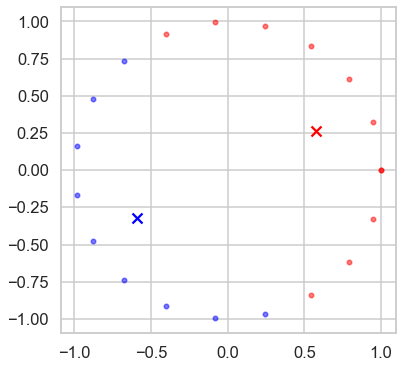

In [6]:
from sklearn.cluster import KMeans
km = KMeans(2,random_state=10, n_init=1)
km.fit(X)
display_cluster(X,km,2)

In [7]:
from sklearn.datasets import make_blobs

### Determining optimium number of clusters

Let's create a new dataset that visually consists on a few clusters and try to group them.

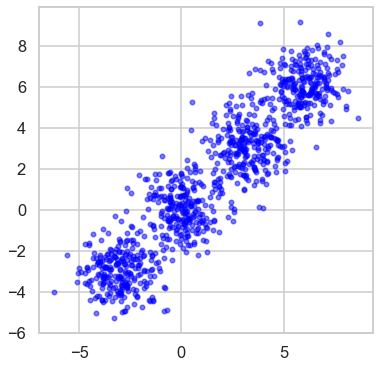

In [8]:
centre = [(-3,-3),(0,0),(3,3),(6,6)]
X, y = make_blobs(n_samples=1000, n_features=2, cluster_std=1.0,
                  centers=centre, shuffle=False, random_state=42)
display_cluster(X)

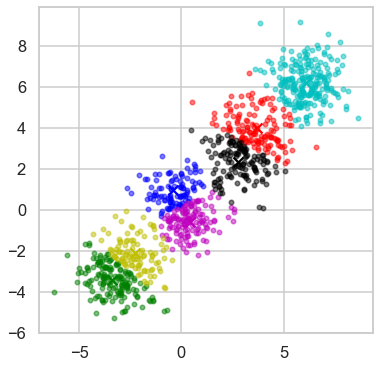

In [9]:
km = KMeans(7)
km.fit(X)
display_cluster(X,km,7)

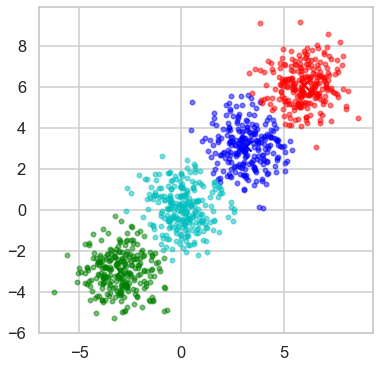

In [10]:
km = KMeans(4)
km.fit(X)
display_cluster(X,km,4)

inertia for 1 to 10 clusters, and plot the inertia as a function of the number of clusters.

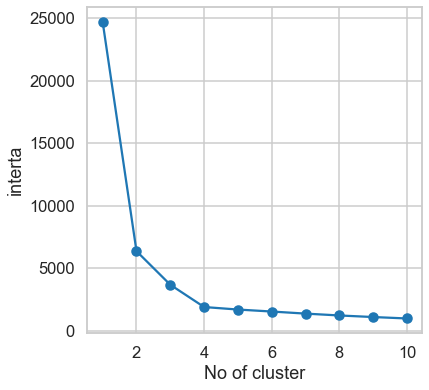

In [11]:
interta =  []
list_no_cluster = list(range(1,11))
for num_cluster in list_no_cluster:
    km = KMeans(num_cluster)
    km.fit(X)
    interta.append(km.inertia_)

plt.plot(list_no_cluster,interta)
plt.scatter(list_no_cluster,interta)
plt.xlabel("No of cluster")
plt.ylabel("interta")
plt.show()


### Clustering Colors from an Image

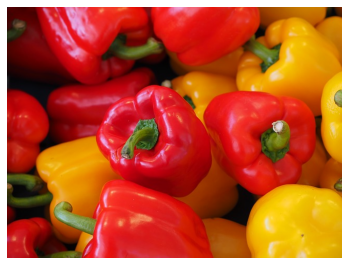

In [12]:
img = plt.imread("D:\HP\IBM_(Machine Learning)\data\peppers.jpg")
plt.imshow(img)
plt.axis("off");


In [13]:
img.shape

(480, 640, 3)

In [14]:
img2 = img.copy()
img2 = img.reshape(img.shape[0]*img.shape[1],3)

##### run k-mean with 8 cluster's

In [15]:
km =  KMeans(n_clusters=8,random_state=0).fit(img2)

Now let's replace each row with its closest cluster center.

In [16]:
for i in np.unique(km.labels_):
    img2[km.labels_== i,:] = km.cluster_centers_[i]

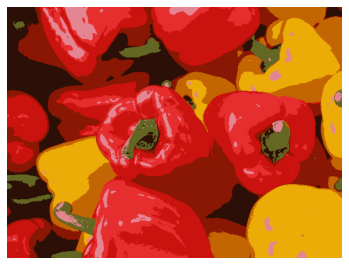

In [17]:
img2 =  img2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off');

In [18]:
### BEGIN SOLUTION
def image_cluster(img, k):
    img_2 = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_2)
    img_3 =  img_2.copy()
    # loops for each cluster center
    for i in np.unique(kmeans.labels_):
        img_3[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    img2 = img_3.reshape(img.shape)
    return img2, kmeans.inertia_
### END SOLUTION

Call the function for k between 2 and 20, and draw an inertia curve. What is the optimum number of clusters?

In [19]:
### BEGIN SOLUTION
k_vals = list(range(2,21,2))
img_list = []
inertia = []
for k in k_vals:
#    print(k)
    img2, ine = image_cluster(img,k)
    img_list.append(img2)
    inertia.append(ine) 
  

C:\Users\pinu0\AppData\Local\Temp/ipykernel_29352/332793868.py:4: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0).fit(img_2)
C:\Users\pinu0\AppData\Local\Temp/ipykernel_29352/332793868.py:4: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0).fit(img_2)
C:\Users\pinu0\AppData\Local\Temp/ipykernel_29352/332793868.py:4: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0).fit(img_2)
C:\Users\pinu0\AppData\Local\Temp/ipykernel_29352/332793868.py:4: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0).fit

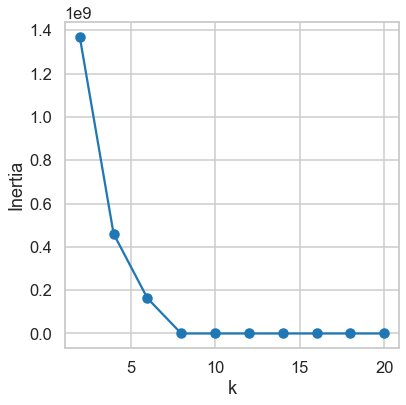

In [20]:
# Plot to find optimal number of clusters
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');

Plot in a grid all the images for the different k values.

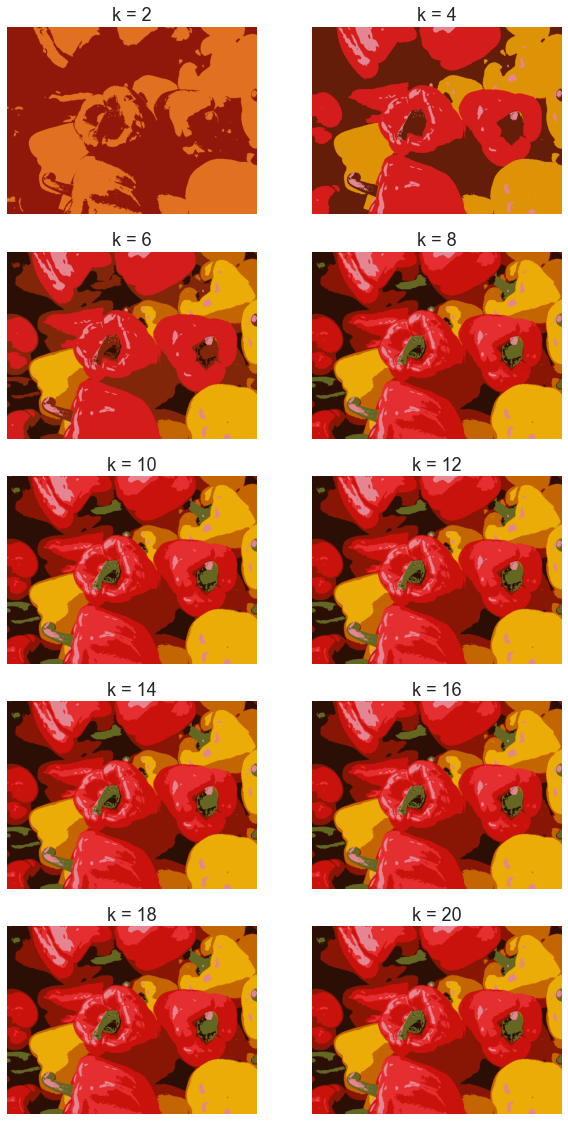

In [21]:
### BEGIN SOLUTION
plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');
### END SOLUTION

#### Example

In [23]:
import pandas as pd
data =  pd.read_csv(r"D:\HP\datasets kaggle\mango2.csv")
data

,GreenMango Length,GreenMangowidth,YelloMangoLength,YelloMangoWidth
0,10.2,10.5,5.6,0.6
1,9.8,9.0,5.6,0.6
2,9.4,9.6,5.2,0.6
3,9.2,9.3,6.0,0.6
4,10.0,10.8,5.6,0.6
...,...,...,...,...
146,12.6,7.5,20.0,5.7
147,13.0,9.0,20.8,6.0
148,12.4,10.2,21.6,6.9
149,11.8,9.0,20.4,5.4


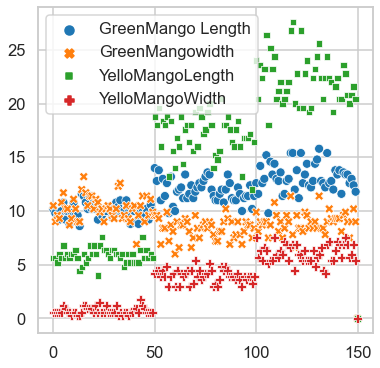

In [24]:
sns.scatterplot(data=data)
plt.show()

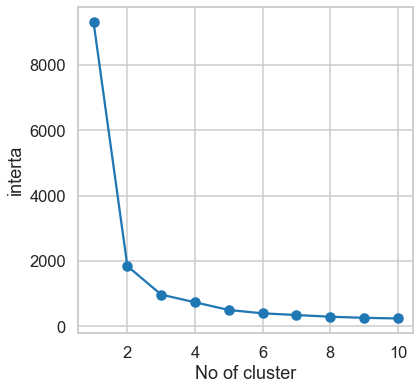

In [25]:
intera = []
no_cluster = list(range(1,11))
for k in no_cluster:
    km =KMeans(k)
    km.fit(data)
    intera.append(km.inertia_)

plt.plot(no_cluster,intera)
plt.scatter(no_cluster,intera)
plt.xlabel("No of cluster")
plt.ylabel("interta")
plt.show()

run k-mean 2 cluster's 

In [26]:
def display_cluster(X,km=[],cluster=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 10
    for i in np.unique(km.labels_):
        plt.scatter(data[km.labels_== i]['GreenMango Length'],data[km.labels_== i]['GreenMangowidth'] ,c=color[i], alpha = alpha,s=20)
        plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c=color[i],marker='x',s=50)

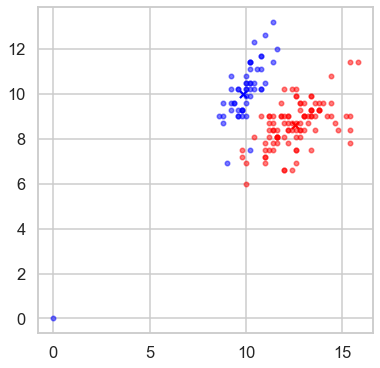

In [27]:
km = KMeans(2,random_state=10, n_init=1)
km.fit(data)
display_cluster(data,km,2)